# Machine Learning Algorithms ( Support Vector Machine and Decision trees ).

### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

### Importing the dataset

In [2]:
df = pd.read_csv('diagnose4.csv')

In [3]:
df.head()

,ID,Gender,Location,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,Diagnosis
0,0,Male,Dublin,119.781071,249.975623,12.213626,616.747483,-67.801441,2245.295350,-173.357067,NaN,247.422864,651.401330,-527.925560,0
1,1,Female,London,19.530750,134.721632,-6.651759,-1047.258296,403.349360,NaN,-56.120561,323.411436,2694.009119,766.443680,-313.190050,2
2,2,Female,NaN,21.260438,-532.933756,4.203863,-899.699109,-325.946321,964.039710,35.871435,873.701879,1158.964157,877.331952,-386.170945,0
3,3,Female,London,89.687882,-919.708815,0.274286,-2944.513415,175.185393,-753.952723,74.910322,328.956405,1363.735160,207.146672,NaN,2
4,4,NaN,Belfast,179.957287,717.183364,-12.874797,-3960.304794,-286.928998,-1888.159139,61.087417,424.554386,3898.100368,228.118640,-3.960441,2


### Data Preprocessing

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 387 entries, 0 to 386
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         387 non-null    int64  
 1   Gender     386 non-null    object 
 2   Location   386 non-null    object 
 3   x1         386 non-null    float64
 4   x2         387 non-null    float64
 5   x3         386 non-null    float64
 6   x4         387 non-null    float64
 7   x5         387 non-null    float64
 8   x6         385 non-null    float64
 9   x7         387 non-null    float64
 10  x8         386 non-null    float64
 11  x9         386 non-null    float64
 12  x10        387 non-null    float64
 13  x11        386 non-null    float64
 14  Diagnosis  387 non-null    int64  
dtypes: float64(11), int64(2), object(2)
memory usage: 45.5+ KB


In [5]:
df.describe()

,ID,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,Diagnosis
count,387.000000,386.000000,387.000000,386.000000,387.000000,387.000000,385.000000,387.000000,386.000000,386.000000,387.000000,386.000000,387.000000
mean,193.000000,4.558917,-135.075281,1.691165,-965.123825,6.023456,-11.073828,-12.998791,5.436705,617.733268,273.478284,15.774216,0.994832
std,111.861522,143.244603,941.910447,11.442658,2094.133191,303.625270,1752.957266,148.978073,583.204343,1439.397343,650.605008,565.881641,0.817537
min,0.000000,-408.555430,-2527.106474,-29.255353,-8579.708089,-862.038082,-5364.743520,-481.411085,-1537.879728,-3670.090485,-1920.603675,-1408.558100,0.000000
25%,96.500000,-88.812203,-886.712296,-5.588551,-2128.884273,-176.398292,-1236.870172,-117.853095,-385.835199,-419.534368,-89.718706,-380.991264,0.000000
50%,193.000000,11.064327,-36.085223,2.633369,-950.204162,21.704146,-195.986971,-6.600129,13.409822,752.490560,357.336728,54.229708,1.000000
75%,289.500000,103.796505,554.705084,9.570294,319.288943,211.762825,1167.590425,79.842394,424.098472,1583.655809,700.359853,402.302187,2.000000
max,386.000000,430.277110,2239.062538,40.891061,5589.189837,852.725612,6113.692714,508.614533,1324.854926,4264.831638,1820.457605,1713.494778,2.000000


In [6]:
df.shape

(387, 15)

In [7]:
df.dtypes

ID             int64
Gender        object
Location      object
x1           float64
x2           float64
x3           float64
x4           float64
x5           float64
x6           float64
x7           float64
x8           float64
x9           float64
x10          float64
x11          float64
Diagnosis      int64
dtype: object

In [8]:
df.nunique().to_frame().rename(columns={0:'Count'})

,Count
ID,387
Gender,2
Location,3
x1,386
x2,387
x3,386
x4,387
x5,387
x6,385
x7,387


In [9]:
df.Diagnosis.value_counts()

0    130
1    129
2    128
Name: Diagnosis, dtype: int64

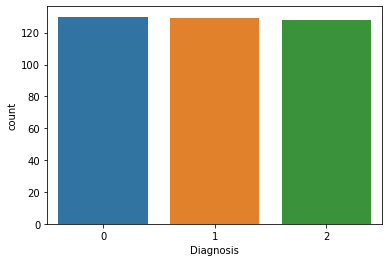

In [10]:
sns.countplot(x="Diagnosis", data=df)
plt.show()

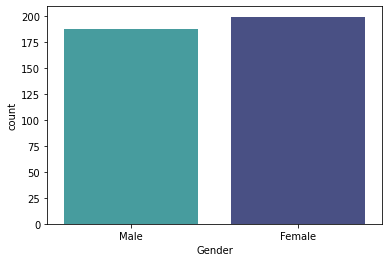

In [11]:
sns.countplot(x='Gender', data=df, palette="mako_r")
plt.xlabel("Gender")
plt.show()

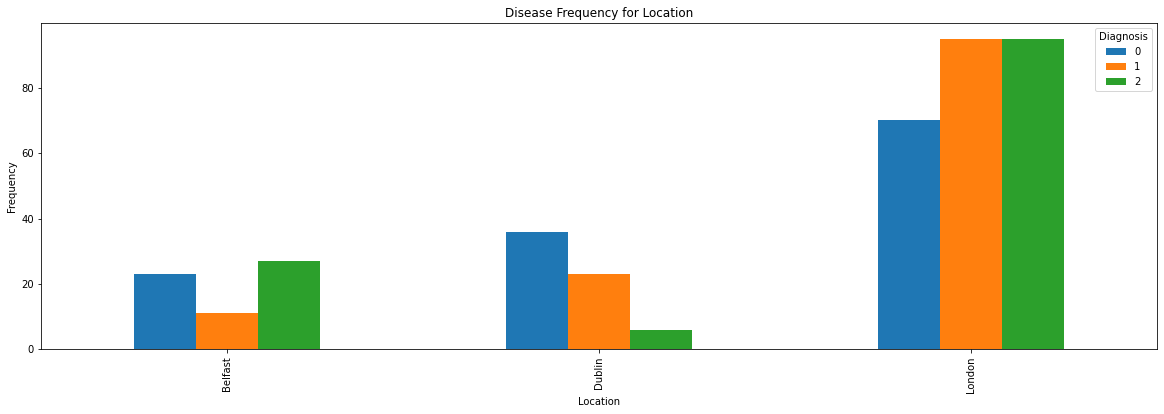

In [12]:
pd.crosstab(df.Location,df.Diagnosis).plot(kind="bar",figsize=(20,6))
plt.title('Disease Frequency for Location')
plt.xlabel('Location')
plt.ylabel('Frequency')
plt.show()

(13.5, -0.5)

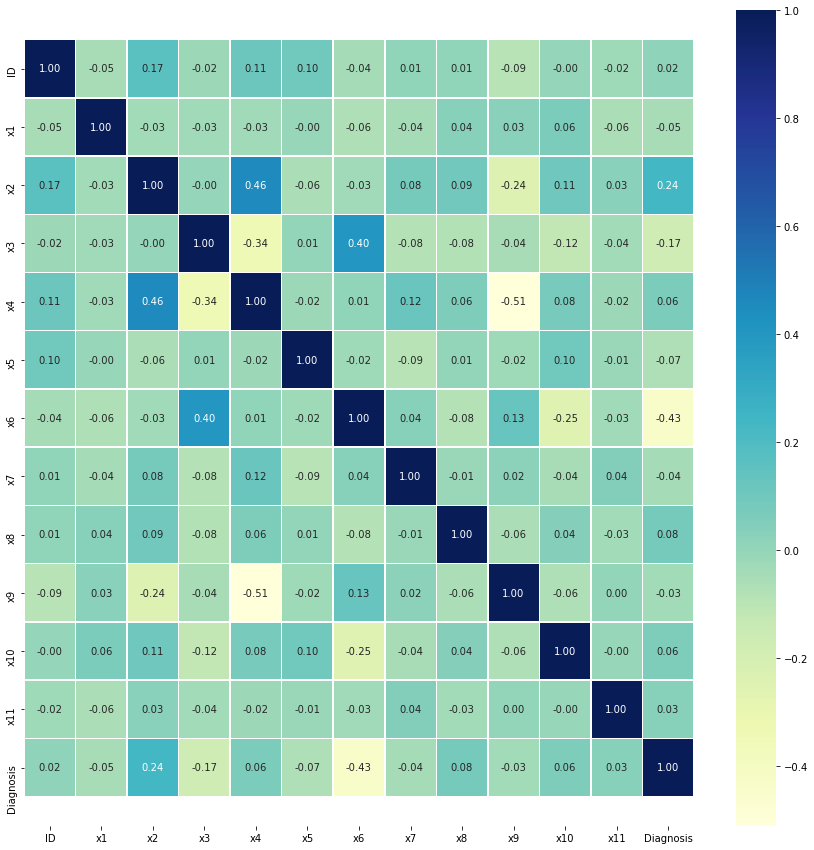

In [13]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

### Data Cleaning

In [14]:
df.duplicated().sum()

0

In [15]:
df.isna().sum()

ID           0
Gender       1
Location     1
x1           1
x2           0
x3           1
x4           0
x5           0
x6           2
x7           0
x8           1
x9           1
x10          0
x11          1
Diagnosis    0
dtype: int64

In [16]:
df.dropna(how="any", inplace=True)

In [17]:
df.isna().sum()

ID           0
Gender       0
Location     0
x1           0
x2           0
x3           0
x4           0
x5           0
x6           0
x7           0
x8           0
x9           0
x10          0
x11          0
Diagnosis    0
dtype: int64

In [18]:
df.Location.value_counts()

London     257
Dublin      63
Belfast     59
Name: Location, dtype: int64

In [19]:
df.replace(to_replace ="Female",value ="0", inplace=True)
df.replace(to_replace ="Male",value ="1",   inplace=True)
df.replace(to_replace ="London",value ="2",   inplace=True)
df.replace(to_replace ="Dublin",value ="3",   inplace=True)
df.replace(to_replace ="Belfast",value ="4",   inplace=True)

df

,ID,Gender,Location,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,Diagnosis
5,5,1,2,-40.250536,688.074756,13.985973,-1000.794322,-176.171530,-1039.329766,21.381157,-497.412941,671.489974,-265.622205,157.804045,2
6,6,0,2,98.553633,-1458.815047,4.990672,-1295.525892,-9.846346,-1475.666393,-82.492002,53.498509,-525.899306,-380.751208,-72.314232,2
7,7,1,2,130.639598,1358.680533,-8.120450,2999.294691,-161.671149,1456.619707,-222.862513,822.473924,-1473.772394,-212.317603,-144.468359,1
9,9,0,4,-132.648613,-261.892497,-7.564280,-2260.440299,-165.610207,-1610.628408,73.261390,312.862149,241.479611,662.017397,591.210536,2
11,11,1,2,259.703093,211.726758,30.731727,-5377.323632,72.776292,2104.988665,-43.600525,338.018611,1247.773560,1408.711507,-364.822412,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382,382,0,3,-194.055391,-500.652429,15.999716,-1468.684650,-57.355126,1203.019068,378.095148,-798.540093,2212.617287,213.316224,148.577793,1
383,383,1,2,-270.626396,919.896384,6.712769,-1847.339710,133.201595,-1178.736989,103.235299,102.494970,632.083495,-469.514914,-250.137753,2
384,384,0,2,-11.262874,-2173.372192,5.798158,-2925.305358,-459.414527,-1290.160664,24.286726,424.701100,874.014093,-291.380199,-387.057984,2
385,385,1,3,-89.119059,-60.531635,12.174778,2259.782220,249.382348,6113.692714,-84.651547,-236.258652,1296.626212,469.936538,-183.924858,0


## 1- Support Vector Machine (SVM)

In [20]:
y = df.Diagnosis.values
X = df.drop(['Diagnosis'], axis = 1)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

- Splitting the dataset into the Training set and Test set

In [22]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

- Feature Scaling

In [23]:
X_train = X_train.T
y_train = y_train.T
X_test = X_test.T
y_test = y_test.T

In [24]:
svm = SVC(random_state = 1)
svm.fit(X_train.T, y_train.T)

acc = svm.score(X_test.T,y_test.T)*100

accuracies = {}
accuracies['SVM'] = acc

print("Test Accuracy of SVM Algorithm: {:.2f}%".format(acc))

Test Accuracy of SVM Algorithm: 69.47%


In [25]:
y_svm = svm.predict(X_test.T)

In [26]:
cm = confusion_matrix(y_test, y_svm)

<AxesSubplot:title={'center':'Support Vector Machine Confusion Matrix'}>

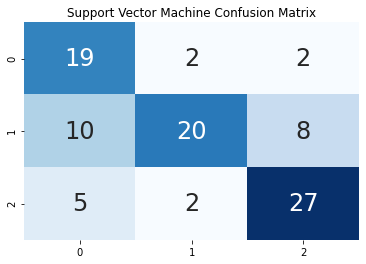

In [27]:
plt.title("Support Vector Machine Confusion Matrix")
sns.heatmap(cm,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

## 2- Decision Trees.

In [28]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train.T, y_train.T)

acc = dtc.score(X_test.T, y_test.T)*100
accuracies['Decision Tree'] = acc
print("Decision Tree Test Accuracy {:.2f}%".format(acc))

Decision Tree Test Accuracy 67.37%


In [29]:
y_dtc = dtc.predict(X_test.T)

In [30]:
cm_dtc = confusion_matrix(y_test,y_dtc)

<AxesSubplot:title={'center':'Decision TreeConfusion Matrix'}>

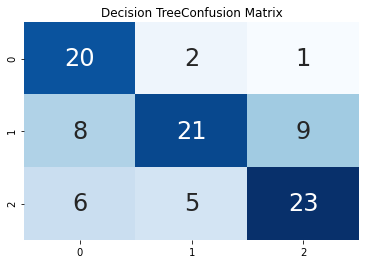

In [31]:
plt.title("Decision TreeConfusion Matrix")
sns.heatmap(cm_dtc,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

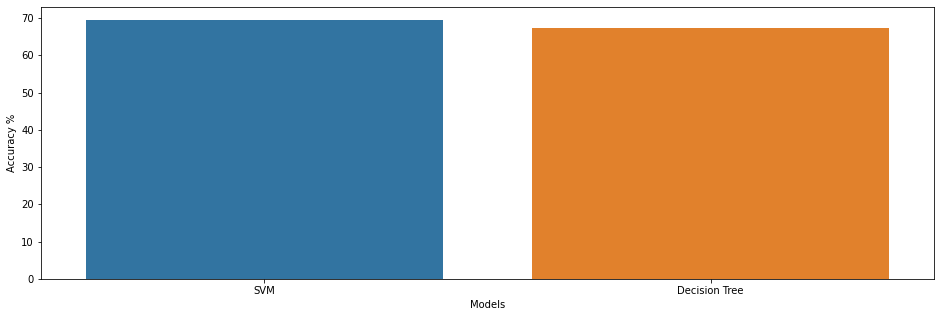

In [33]:
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Models")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()))
plt.show()

- Comparing Models